In [1]:
from ast import literal_eval

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
df = pd.read_csv("../data/playlist_data_cache.csv")

In [3]:
# Convert the 'genres' column from string to list of strings
df['genres'] = df['genres'].apply(literal_eval)

In [4]:
# Extract the first genre from the list of genres and create a new column 'main_genre'
df['main_genre'] = df['genres'].apply(lambda x: x[0] if x else None)

In [5]:
# Count the number of tracks for each genre
genre_counts = df['main_genre'].value_counts()

c:\Users\phenr\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\phenr\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\phenr\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


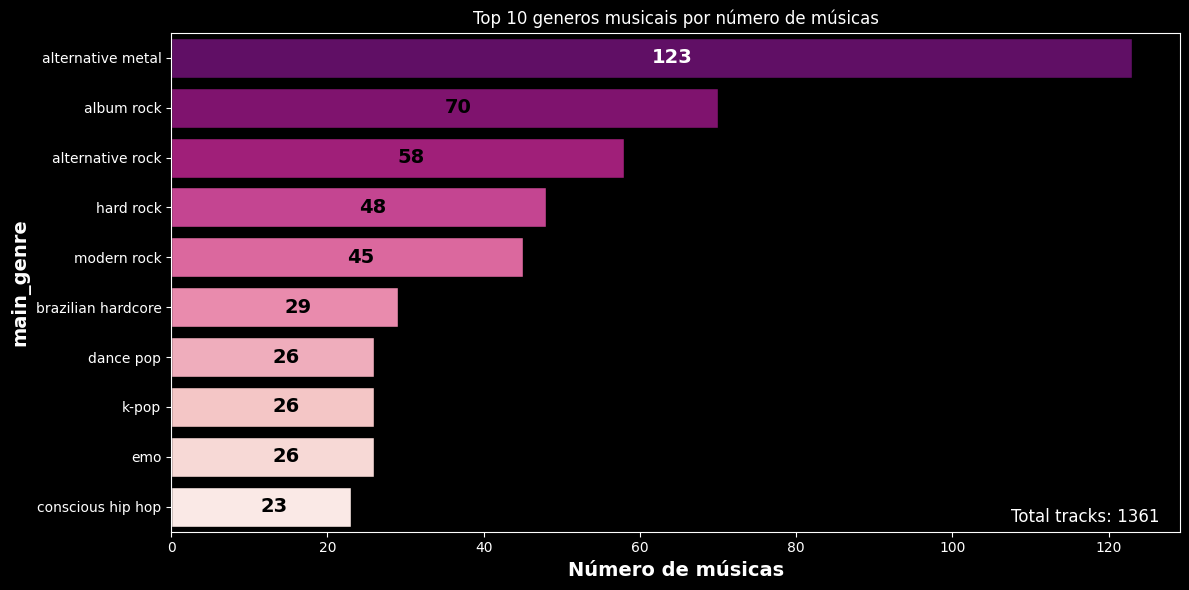

In [7]:
# plot the top 10 artists bar chart
# color palette
plt.style.use("dark_background")
palette = sns.color_palette("RdPu", 10)[::-1]
sns.set_palette(palette)
sns.color_palette("rocket")

# create a figure with size 12x6
plt.figure(figsize=(12, 6))

# set labels and titles
plt.title("Top 10 generos musicais por número de músicas")
plt.xlabel("Número de músicas", fontsize=14, fontweight="bold")
plt.ylabel("Artista", fontsize=14, fontweight="bold")

# Create a horizontal bar plot 
barplot = sns.barplot(
    x=genre_counts[:10].values,
    y=genre_counts[:10].index,
    palette=palette,
    edgecolor="black",
    orient="h",
)

# Add the total number of tracks inside the bars
for i, p in enumerate(barplot.patches):
        width = p.get_width()
        # Get the RGB color of the bar and convert it to HSV
        rgb_color = mcolors.colorConverter.to_rgb(palette[i])
        hsv_color = mcolors.rgb_to_hsv(rgb_color)
        # If the value/brightness component of the HSV color is less than 0.5, set the text color to white, else set it to black
        text_color = 'white' if hsv_color[2] < 0.5 else 'black'
        # Add the text inside the bar
        plt.text(x = width/2,
                y = p.get_y()+(p.get_height()/2), 
                s = '{:.0f}'.format(width),
                va = 'center',
                color = text_color,  # Set the text color
                fontsize = 14,
                fontweight = 'bold')
        

# Add total of tracks as side information on the graph

total_tracks = df['track_id'].nunique()
plt.text(
        x = 0.98, 
        y = 0.02, 
        s = f'Total tracks: {total_tracks}', 
        transform=plt.gca().transAxes, 
        fontsize=12, 
        horizontalalignment='right'
        )


# adjust the layout of the plot
plt.tight_layout()

# save the plot as a png file
plt.savefig("../images/top10_genres.png", dpi=300)

plt.show()